# Performing Analysis of Meteorological Data

### About Dataset :

- The dataset has hourly temperature recorded for last 10 years starting from 2006-04-01
00:00:00.000 +0200 to 2016-09-09 23:00:00.000 +0200. It corresponds to Finland, a country in
the Northern Europe. 
- You can download the dataset from this Google link:
https://www.kaggle.com/muthuj7/weather-dataset

## Question :

- The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming" 
- The H0 means we need to find whether the average Apparent temperature for the month of a month say April starting from 2006 to 2016 and the average humidity for the same period have increased or not. This monthly analysis has to be done for all 12 months over the 10 year period. So you are basically resampling your data from hourly to monthly, then comparing the same month over the 10 year period. Support your analysis by appropriate visualizations using matplotlib and / or seaborn library.

In [1]:
# load the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data

WhetherData = pd.read_csv('weatherHistory.csv')

In [3]:
# Dataset 

WhetherData.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
#shape of the data

WhetherData.shape

(96453, 11)

In [5]:
#info about data

WhetherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [6]:
#Statistics of ech columns of data
WhetherData.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
#Check for null values
WhetherData.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
WhetherData.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [12]:
#Fetch only columns which is required for analysis
columns = ['Formatted Date', 'Apparent Temperature (C)', 'Humidity']

In [13]:
WhetherData = WhetherData[columns]

In [14]:
WhetherData

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83
...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,0.43
96449,2016-09-09 20:00:00.000 +0200,24.583333,0.48
96450,2016-09-09 21:00:00.000 +0200,22.038889,0.56
96451,2016-09-09 22:00:00.000 +0200,21.522222,0.60


In [15]:
#format the date column
WhetherData['Formatted Date'] = pd.to_datetime(WhetherData['Formatted Date'], utc=True)
WhetherData.head(5)

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-03-31 22:00:00+00:00,7.388889,0.89
1,2006-03-31 23:00:00+00:00,7.227778,0.86
2,2006-04-01 00:00:00+00:00,9.377778,0.89
3,2006-04-01 01:00:00+00:00,5.944444,0.83
4,2006-04-01 02:00:00+00:00,6.977778,0.83


In [16]:
#set index of data as a date
WhetherData = WhetherData.set_index("Formatted Date")
WhetherData

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,6.977778,0.83
...,...,...
2016-09-09 17:00:00+00:00,26.016667,0.43
2016-09-09 18:00:00+00:00,24.583333,0.48
2016-09-09 19:00:00+00:00,22.038889,0.56


In [17]:
# resample data from hourly to monthly
WhetherDataMonthwise = WhetherData[["Apparent Temperature (C)","Humidity"]].resample('M').mean()
WhetherDataMonthwise

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-31 00:00:00+00:00,21.383094,0.674046
2016-09-30 00:00:00+00:00,18.355833,0.688833
2016-10-31 00:00:00+00:00,9.825775,0.827951


### Graph of Temperature & Humidity over 10 years.

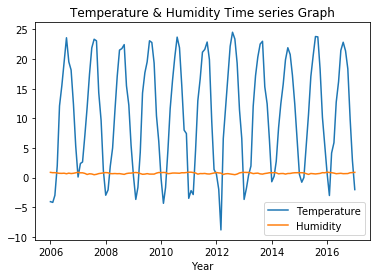

In [23]:
plt.plot(WhetherDataMonthwise["Apparent Temperature (C)"], label="Temperature")
plt.plot(WhetherDataMonthwise["Humidity"], label="Humidity")
plt.title("Temperature & Humidity Time series Graph")
plt.legend()
plt.xlabel("Year")
plt.show()

It shows that average Humidity remains same for 10 years and Temperature graph is seasonal.

Null Hypothesis(H0) : Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming

### Humidity and Temperature graph for all months.

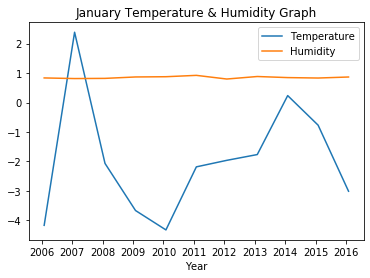

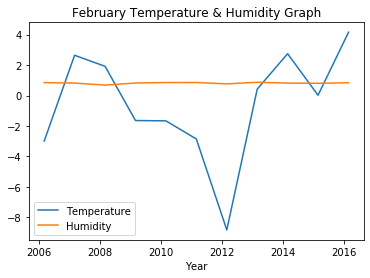

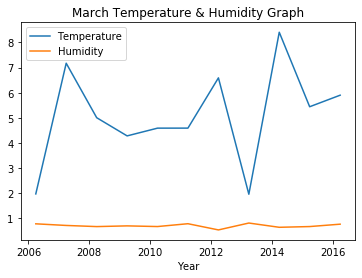

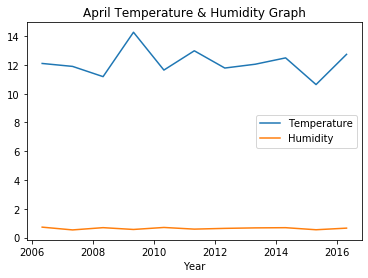

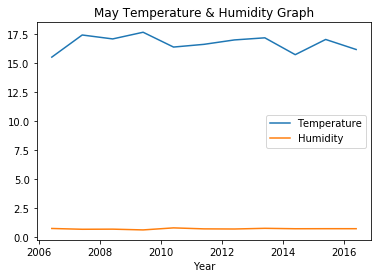

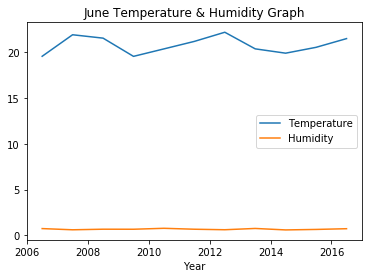

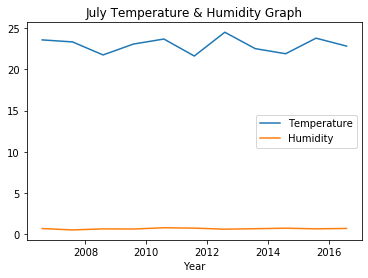

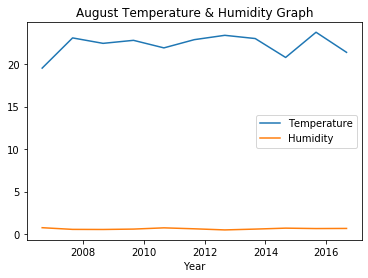

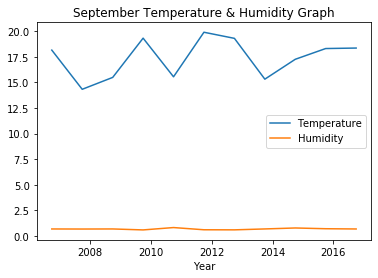

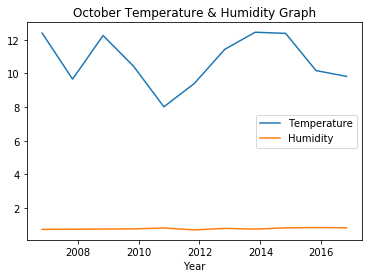

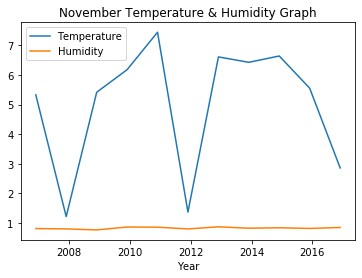

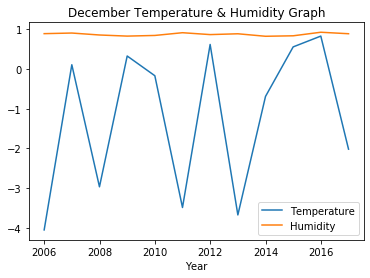

In [27]:
Month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
for i in range(1,13):
    MonthData = WhetherDataMonthwise[WhetherDataMonthwise.index.month==i]
    plt.plot(MonthData["Apparent Temperature (C)"], label="Temperature")
    plt.plot(MonthData["Humidity"], label="Humidity")
    plt.title(Month[i-1]+" Temperature & Humidity Graph")
    plt.legend()
    plt.xlabel("Year")
    plt.show()

### Temperature graph for all months.

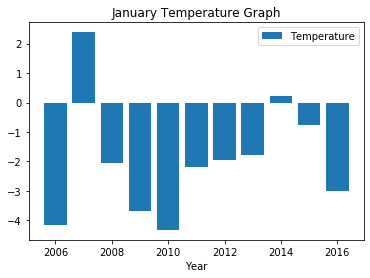

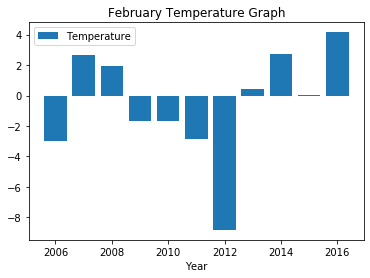

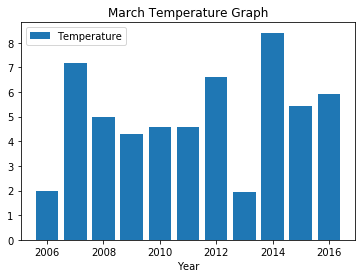

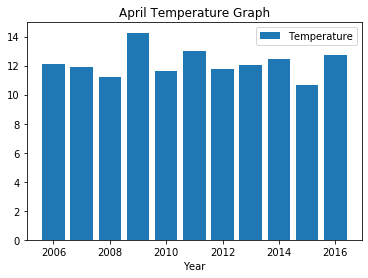

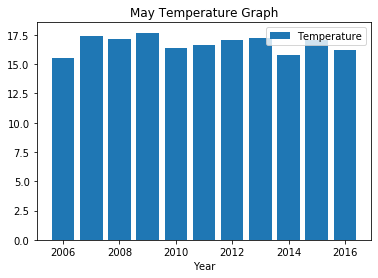

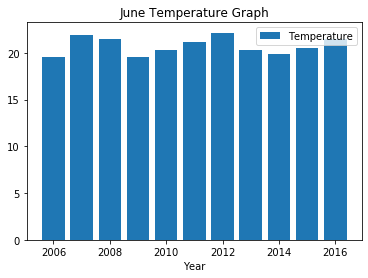

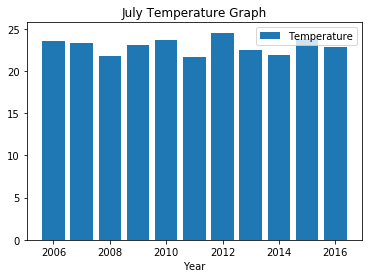

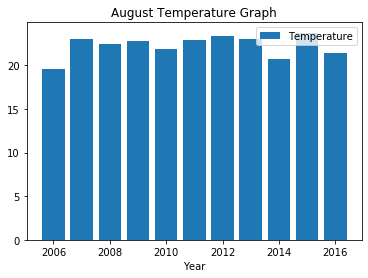

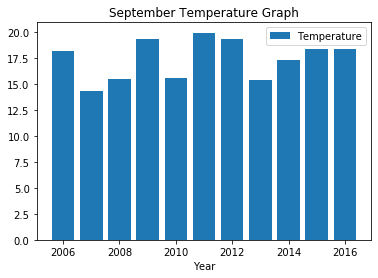

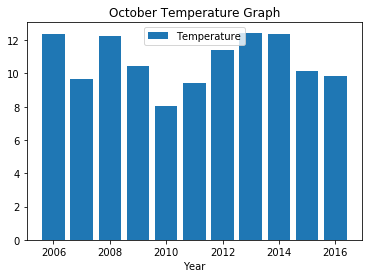

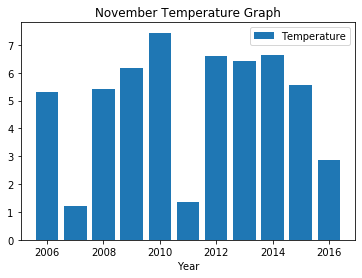

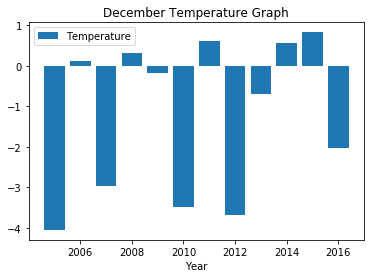

In [28]:
for i in range(1,13):
    MonthData = WhetherDataMonthwise[WhetherDataMonthwise.index.month==i]
    plt.bar(MonthData.index.year, MonthData["Apparent Temperature (C)"], label="Temperature")
    plt.title(Month[i-1]+" Temperature Graph")
    plt.legend()
    plt.xlabel("Year")
    plt.show()

### Humidity graph for all months.

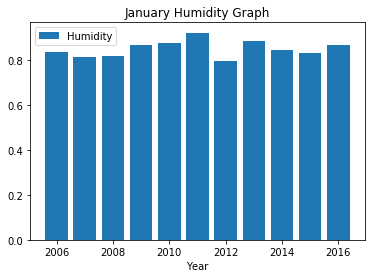

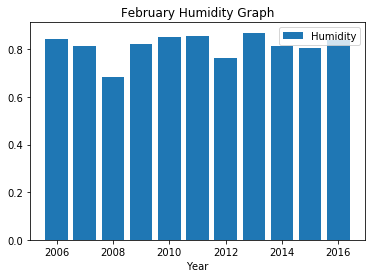

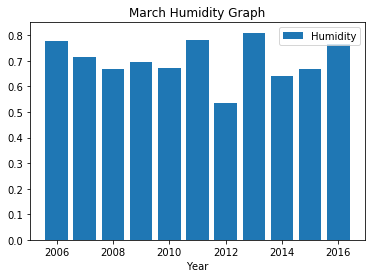

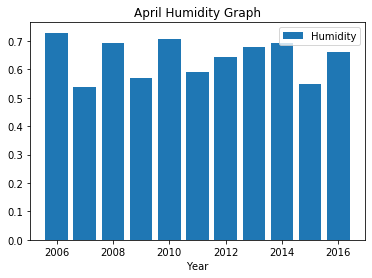

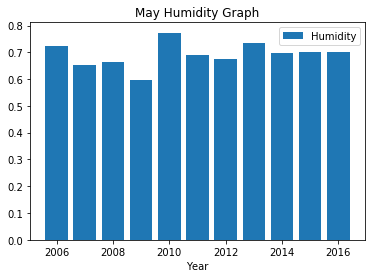

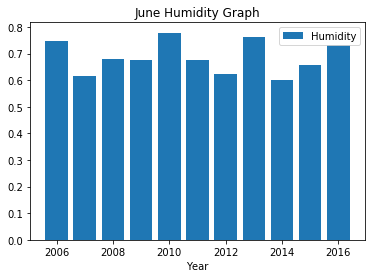

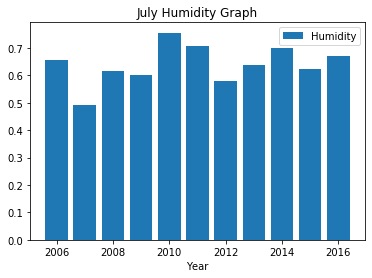

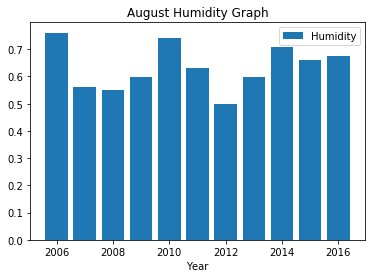

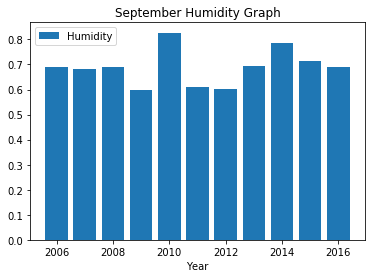

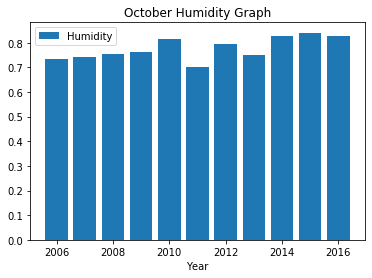

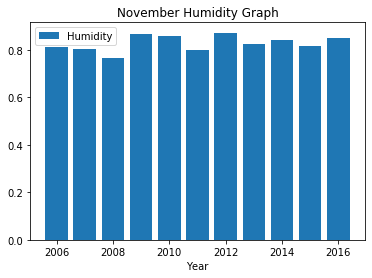

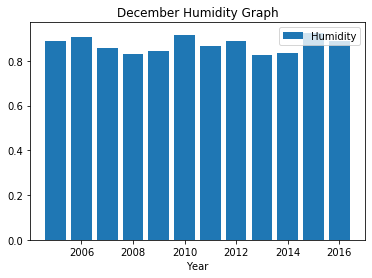

In [29]:
for i in range(1,13):
    MonthData = WhetherDataMonthwise[WhetherDataMonthwise.index.month==i]
    plt.bar(MonthData.index.year, MonthData["Humidity"], label="Humidity")
    plt.title(Month[i-1]+" Humidity Graph")
    plt.legend()
    plt.xlabel("Year")
    plt.show()

From above graphs we can say that average humidity remains same for all 10 years. But for temperature has suddend fluctuation for some month.